# 1. Uso básico de GPyOpt

In [1]:
import GPy
import GPyOpt
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import os

# 1. Implementación en una dimensión

In [2]:
# Define the function 
def fpol(x):
    x = x+60
#     f = np.poly1d([1, -2, -28, 28, 12, -26, 100])
    SineLowFreq = np.sin(x * 0.01 * np.pi)
    SineMedFreq = 0.25 * np.sin(x * 0.01 * np.pi * 4.9)
    SineHighFreq = 0.15 * np.sin(x * 0.01 * np.pi * 12.1)
#    f = SineLowFreq + SineMedFreq + SineHighFreq;
    f = SineLowFreq - SineMedFreq + 0.0001*x**2 - 1.1
#     f = SineLowFreq
    # Return the value of the polynomial
    return f * 1.5

Minimum of -0.6795 occurs at 71.1671


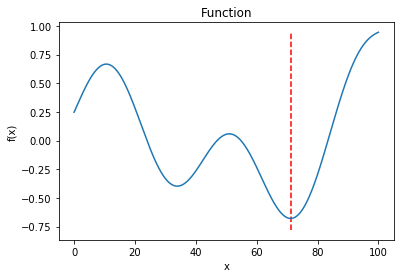

In [3]:
# Plot the function

# Space over which to evluate the function is -5 to 6
xmin=0
xmax=100
x = np.linspace(xmin,xmax, 10000)
y = fpol(x)

miny = min(y)
minx = x[np.argmin(y)]

# Visualize the function
#plt.figure(figsize = (8, 6))
#plt.style.use('fivethirtyeight')
plt.title('Function'); 
plt.xlabel('x'); 
plt.ylabel('f(x)')
plt.vlines(minx, min(y)- 0.1, max(y), linestyles = '--', colors = 'r')
plt.plot(x, y);

# Print out the minimum of the function and value
print('Minimum of %0.4f occurs at %0.4f' % (miny, minx))

In [707]:
def my_BO(iseed,maxeval):
    seed(iseed)
    initer=1
    ARD=False
    lf=18
    varf=0.5
    noise_var=None
    exact_feval=True
    optimize_restarts=0
    xi=0.21
    # Define the function's bounds
    space = [{'name': 'x', 'type': 'continuous', 'domain': (xmin,xmax)}]
    # define RBF kernel a.k.a. squared-exponential (SE)
    kernel=GPy.kern.RBF(input_dim=1,variance=varf,lengthscale=lf,ARD=ARD)
    # define GP model:
    model=GPyOpt.models.GPModel(kernel=kernel,noise_var=noise_var,exact_feval=exact_feval,
                                optimizer='lbfgs',optimize_restarts=optimize_restarts,
                                verbose=False,ARD=ARD)
    dspace=GPyOpt.Design_space(space=space)
    objective=GPyOpt.core.task.SingleObjective(fpol)
    # define initial data
    init_space = [{'name': 'x', 'type': 'continuous', 'domain': (35,36)}]
    dinit_space=GPyOpt.Design_space(space=init_space)
    initial_design=GPyOpt.experiment_design.initial_design('random',dinit_space,initer)
    # define acquisition optimizer
    acquisition_optimizer=GPyOpt.optimization.AcquisitionOptimizer(dspace, optimizer='lbfgs')
    # define type of acquisition function: Expected Improvement 
    acquisition=GPyOpt.acquisitions.AcquisitionEI(model,dspace,acquisition_optimizer,jitter=xi)
    # define sequential evaluator
    evaluator=GPyOpt.core.evaluators.Sequential(acquisition)
    myBopt=GPyOpt.methods.ModularBayesianOptimization(model,dspace,objective,acquisition,
                                                          evaluator,X_init=initial_design,normalize_Y=False)
    max_iter=maxeval    # evaluation budget
    myBopt.run_optimization(max_iter)
    myBopt.plot_acquisition()

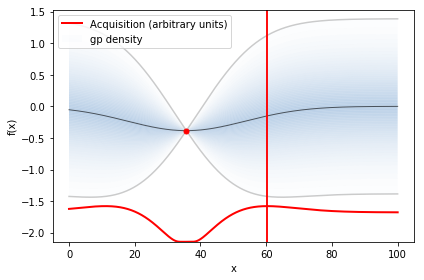

0

In [708]:
maxeval=0
my_BO(iseed,maxeval)
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata test/.")

In [613]:
iseed=123

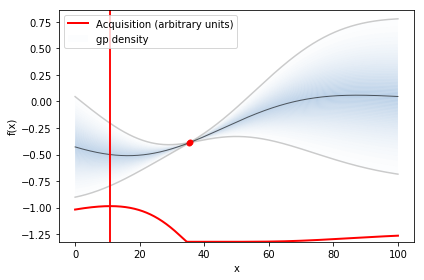

0

In [614]:
maxeval=0
my_BO(iseed,maxeval)
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata initer1/.")

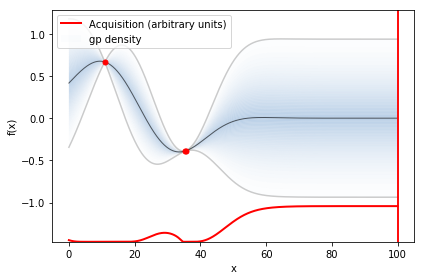

0

In [615]:
maxeval=1
my_BO(iseed,maxeval)
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval1/.")

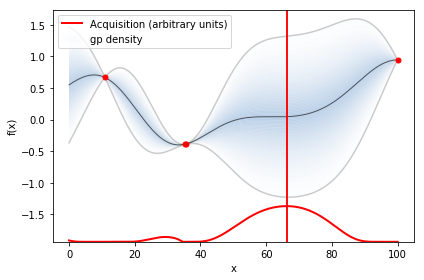

0

In [616]:
maxeval=2
my_BO(iseed,maxeval)
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval2/.")

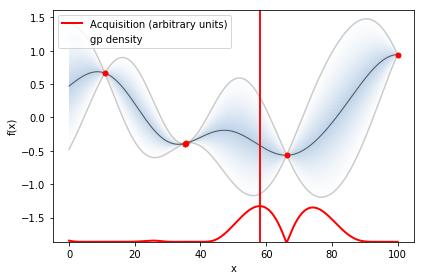

0

In [617]:
maxeval=3
my_BO(iseed,maxeval)
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval3/.")

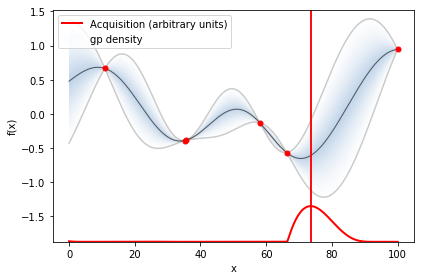

0

In [618]:
maxeval=4
my_BO(iseed,maxeval)
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval4/.")

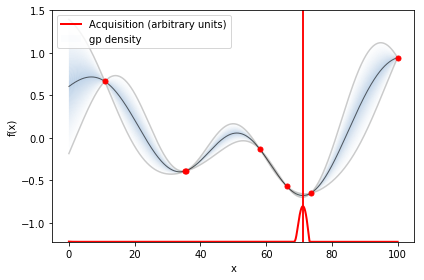

0

In [619]:
maxeval=5
my_BO(iseed,maxeval)
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval5/.")

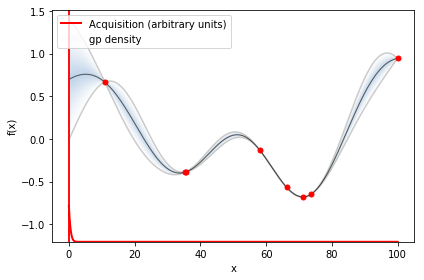

0

In [620]:
maxeval=6
my_BO(iseed,maxeval)
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval6/.")

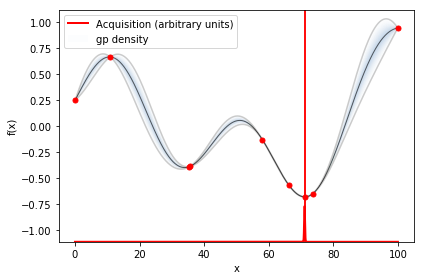

0

In [621]:
maxeval=7
my_BO(iseed,maxeval)
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval7/.")

In [ ]:
maxeval=8
my_BO(iseed,maxeval)
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval8/.")

In [ ]:
maxeval=9
my_BO(iseed,maxeval)
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval9/.")

In [ ]:
maxeval=10
my_BO(iseed,maxeval)
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval10/.")

In [ ]:
maxeval=11
my_BO(iseed,maxeval)
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval11/.")

In [ ]:
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval12/.")

# Plots

In [4]:
from matplotlib.ticker import MaxNLocator

In [5]:
mpl_blue_rvb = (191. / 255., 209. / 256., 212. / 255.)

In [6]:
mpl_darkblue_rvb =  'tab:blue'

In [17]:
def plot_gp(folder,x,y,top,bottom):
    x_grid=np.loadtxt(folder+"xgrid")
    m=np.loadtxt(folder+"mean")
    m_plus=np.loadtxt(folder+"mean_plus")
    m_less=np.loadtxt(folder+"mean_less")
    Xdata=np.loadtxt(folder+"Xdata")
    Ydata=np.loadtxt(folder+"Ydata")
    acqu=np.loadtxt(folder+"acquisition")
    xline=np.loadtxt(folder+"xline")
    fill_color = mpl_blue_rvb
    fig = plt.figure(figsize=(10,7))
    ax = plt.subplot(111)
    plt.plot(x,-y,'k--',lw=1)
    plt.plot(x_grid,-m,mpl_darkblue_rvb,lw=2,label='Media')
    ax.fill_between(x_grid,-m_plus,-m_less, facecolor=mpl_blue_rvb,label='Incerteza')
    datalen=len(Xdata)
    plt.plot(Xdata[1:datalen],-Ydata[1:datalen], 'r.', markersize=16)
#    plt.plot(Xdata,Ydata,'r.',markersize=16)
    minacqu=abs(min(acqu))
    acqushift=minacqu-1.95
    plt.plot(x_grid,acqu+acqushift, 'r-',lw=2,label ='Adquisición')
    plt.axvline(x=xline,color='r')
    plt.ylim(bottom, top)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('$x$',fontsize=22)
    plt.ylabel('$f(x)$',fontsize=22)
    plt.legend(loc='upper right',fontsize=18)
    ax.tick_params(direction='out',labelsize=18)
    plt.savefig(folder+"example.eps")
    plt.show()

In [8]:
top=2.
bottom=-2.
yprior=1.35

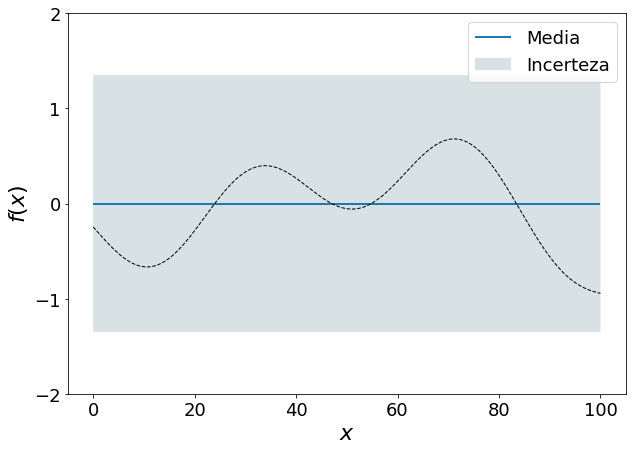

In [9]:
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
plt.plot(x, -y,'k--',lw=1)
plt.ylim(bottom, top)
plt.xlabel('$x$',fontsize=22)
plt.ylabel('$f(x)$',fontsize=22)
plt.hlines(0, xmin, xmax, color=mpl_darkblue_rvb,lw=2, linestyles='solid',label='Media')
ax.fill_between(x,yprior,-yprior, facecolor=mpl_blue_rvb,alpha=0.6,label='Incerteza')
ax.tick_params(direction='out',labelsize=18)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(loc='upper right',fontsize=18)
plt.savefig("./funcion.eps")
plt.show()

In [10]:
folder="initer1/"
x_grid=np.loadtxt(folder+"xgrid")
m=np.loadtxt(folder+"mean")
m_plus=np.loadtxt(folder+"mean_plus")
m_less=np.loadtxt(folder+"mean_less")
Xdata=np.loadtxt(folder+"Xdata")
Ydata=np.loadtxt(folder+"Ydata")
acqu=np.loadtxt(folder+"acquisition")
xline=np.loadtxt(folder+"xline")
fill_color = mpl_blue_rvb

In [11]:
folder="test/"
x_grid=np.loadtxt(folder+"xgrid")
mt=np.loadtxt(folder+"mean")
mt_plus=np.loadtxt(folder+"mean_plus")
mt_less=np.loadtxt(folder+"mean_less")
acqu=np.loadtxt(folder+"acquisition")

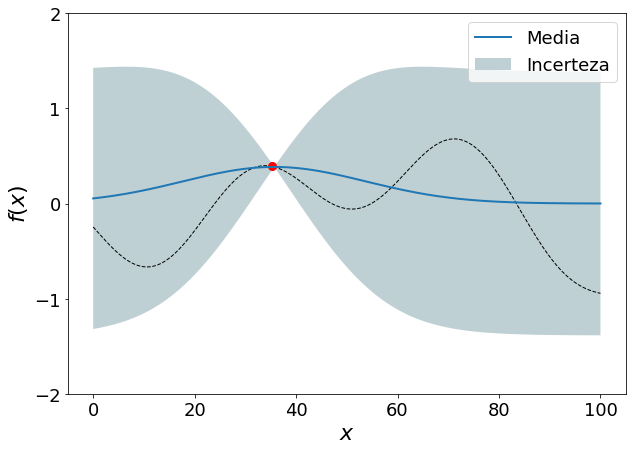

In [14]:
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
plt.plot(x, -y,'k--',lw=1)
datalen=len(Xdata)
plt.plot(Xdata[1:datalen], -Ydata[1:datalen], 'r.', markersize=16)
#plt.plot(Xdata,Ydata,'r.',markersize=16)
plt.plot(x_grid,-mt,color=mpl_darkblue_rvb,lw=2,label='Media')
ax.fill_between(x_grid,-mt_plus,-mt_less, facecolor=mpl_blue_rvb,label='Incerteza')
plt.ylim(bottom, top)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('$x$',fontsize=22)
plt.ylabel('$f(x)$',fontsize=22)
ax.tick_params(direction='out',labelsize=18)
plt.legend(loc='upper right',fontsize=18)
plt.savefig("./func_mean.eps")
plt.show()

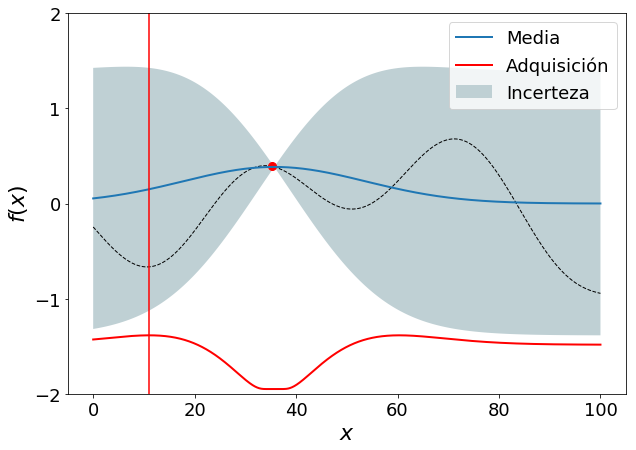

In [15]:
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
plt.plot(x,-y,'k--',lw=1)
plt.plot(Xdata[1:datalen],-Ydata[1:datalen], 'r.', markersize=16)
#plt.plot(Xdata,Ydata,'r.',markersize=16)
plt.plot(x_grid,-mt,color=mpl_darkblue_rvb,lw=2,label='Media')
ax.fill_between(x_grid,-mt_plus,-mt_less, facecolor=mpl_blue_rvb,label='Incerteza')
minacqu=abs(min(acqu))
acqushift=minacqu-1.95
plt.plot(x_grid,acqu+acqushift, 'r-',lw=2,label ='Adquisición')
plt.axvline(x=xline,color='r')
plt.ylim(bottom, top)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('$x$',fontsize=22)
plt.ylabel('$f(x)$',fontsize=22)
plt.legend(loc='upper right',fontsize=18)
ax.tick_params(direction='out',labelsize=18)
plt.savefig("./func_acq.eps")
plt.show()

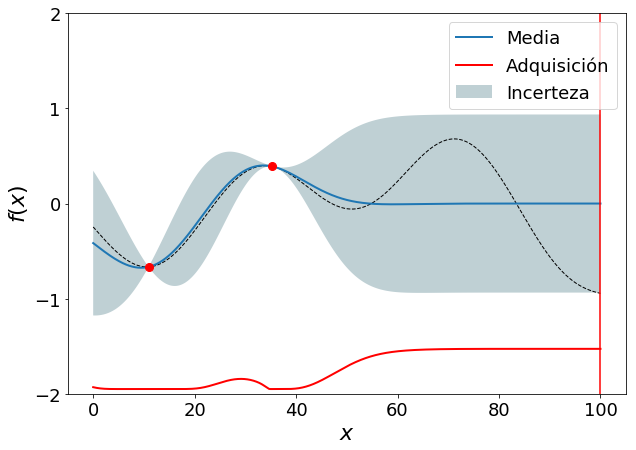

In [18]:
plot_gp("eval1/",x,y,top,bottom)

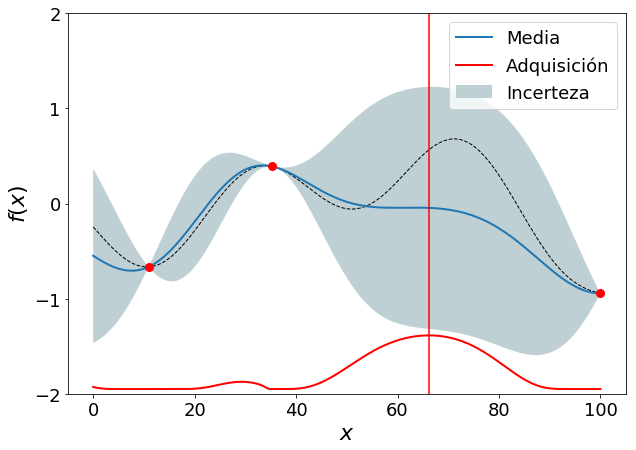

In [19]:
plot_gp("eval2/",x,y,top,bottom)

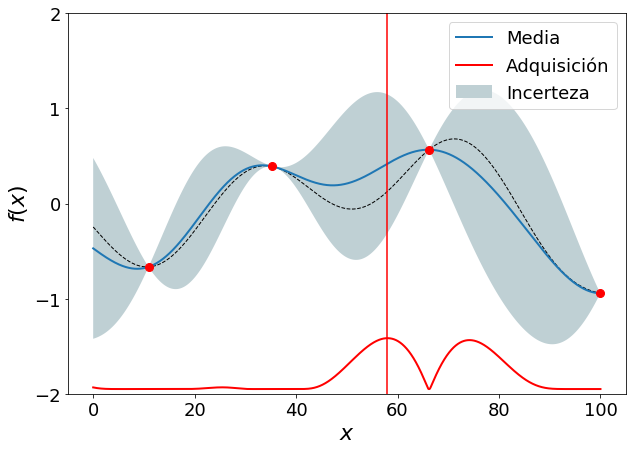

In [20]:
plot_gp("eval3/",x,y,top,bottom)

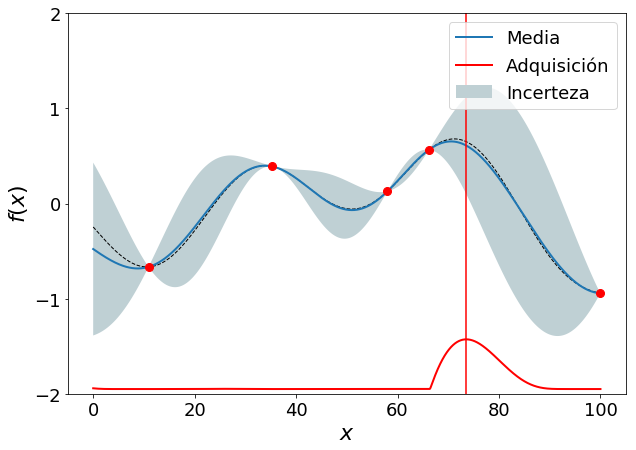

In [21]:
plot_gp("eval4/",x,y,top,bottom)

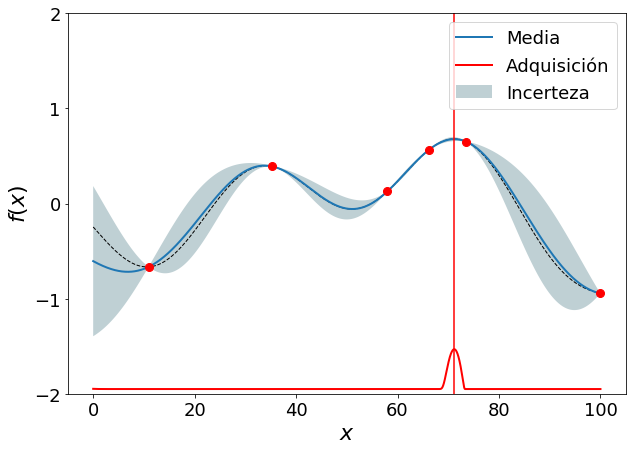

In [22]:
plot_gp("eval5/",x,y,top,bottom)

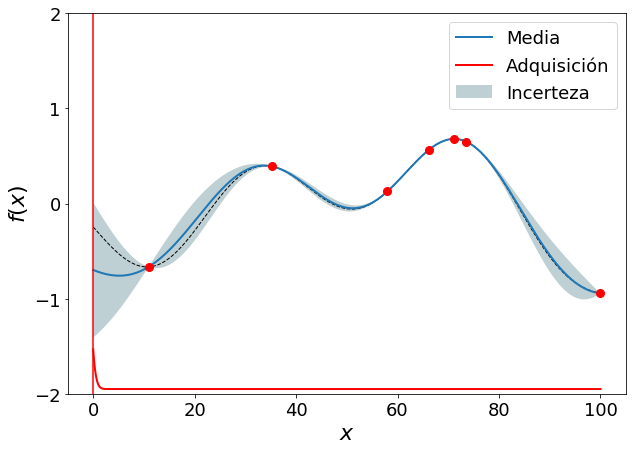

In [23]:
plot_gp("eval6/",x,y,top,bottom)

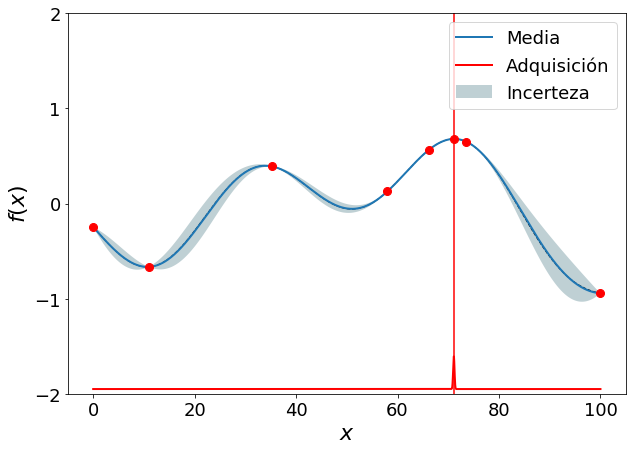

In [24]:
plot_gp("eval7/",x,y,top,bottom)

In [ ]:
plot_gp("eval8/",x,y,top,bottom,-0.7)

In [ ]:
plot_gp("eval9/",x,y,top,bottom,-0.7)

In [ ]:
plot_gp("eval10/",x,y,top,bottom,-0.7)

In [ ]:
plot_gp("eval11/",x,y,top,bottom,-0.7)

In [ ]:
plot_gp("eval12/",x,y,top,bottom,-0.7)